# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


# 1. Với mức ý nghĩa 5% kiểm định giải thiết giá gạo trung bình năm 2019 là 10 Lira/kg

In [4]:
# Liệt kê các sản phẩm
df.ProductName.unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [5]:
# Lọc ra dataframe chỉ chứa giá gạo năm 2019
df_rice = df[(df.ProductName == "Rice - Retail") & (df.Year == 2019)]
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 54 to 5833
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        48 non-null     object 
 1   ProductId    48 non-null     int64  
 2   ProductName  48 non-null     object 
 3   UmId         48 non-null     int64  
 4   UmName       48 non-null     object 
 5   Month        48 non-null     int64  
 6   Year         48 non-null     int64  
 7   Price        48 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.4+ KB


In [6]:
df_rice.describe()

,ProductId,UmId,Month,Year,Price
count,48.0,48.0,48.000000,48.0,48.000000
mean,52.0,5.0,6.500000,2019.0,9.384565
std,0.0,0.0,3.488583,0.0,0.674674
min,52.0,5.0,1.000000,2019.0,8.061700
25%,52.0,5.0,3.750000,2019.0,8.798975
50%,52.0,5.0,6.500000,2019.0,9.430650
75%,52.0,5.0,9.250000,2019.0,10.110000
max,52.0,5.0,12.000000,2019.0,10.404300


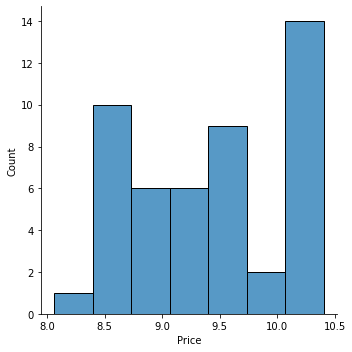

In [7]:
sns.displot(x = df_rice.Price)

<AxesSubplot:xlabel='Price', ylabel='Density'>

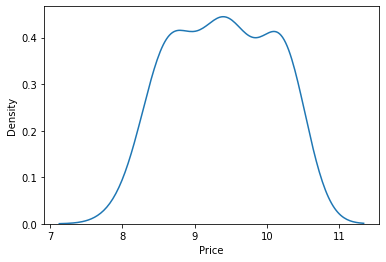

In [8]:
sns.kdeplot(x = "Price", data = df_rice)

Do phân bố có xu hướng gần giống phân bố chuẩn, nên lực chọn thực hiện kiểm định hai phía với One Sample T test
- Giả thuyết không: Giá gạo trung bình  = 9.5
- Giả thuyết đối: Giá gạo trung bình # 9.5

In [9]:
print(stats.ttest_1samp(df_rice.Price, 9.5))

Ttest_1sampResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567)


Do giá trị pvalue > 5% nên không đủ cơ sở để bác bỏ giả thuyết không.</br>
=> Kết luận: Với mức ý nghĩa 5% có thể nhận định giá gạo trung bình bằng 9.5 Lira/kg

# 2. Với mức ý nghĩa 5% hãy kiểm định giả thiết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

In [10]:
# Lấy thông tin bột mỳ năm 2019
df_wheat = df[(df.ProductName == "Wheat flour - Retail") & (df.Year == 2019)]

In [11]:
df_wheat.Price.describe()

count    48.000000
mean      3.685917
std       0.290390
min       3.067200
25%       3.504250
50%       3.770950
75%       3.900500
max       4.270300
Name: Price, dtype: float64

<AxesSubplot:>

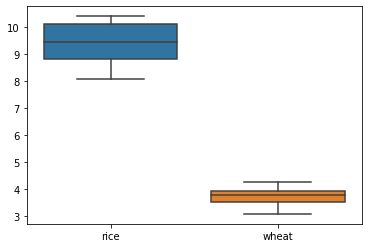

In [12]:
# Tạo boxplot so sánh phân bố của bột lỳ và giá gạo
price = {"rice": list(df_rice.Price),
        "wheat": list(df_wheat.Price)}
df_price = pd.DataFrame(price)
sns.boxplot(data = df_price)

Nhìn vào phân bố trên, chúng ta có thể kết luận rằng giá bột mỳ luôn thấp hơn giá gạo. </br>
Để chứng minh nhận định giá bột mỳ và giá gạo không giống nhau, chúng ta thực hiện so sánh trung bình độc lập - independent T Test </br>
- Giả thuyết không: Giá bột mỳ trung bình bằng giá gạo
- Giả thuyết đối: Giá bột mỳ trung bình khác giá gạo

In [13]:
print(stats.ttest_ind(price["rice"], price["wheat"], equal_var= False))

Ttest_indResult(statistic=53.7516920363042, pvalue=7.11046528586048e-55)


Chúng ta có thể thấy pvalue = 7.11 * 10 ^ -55 < 5%, bác bỏ giả thuyết không, chấp nhận giả thuyết đối </br>
=> Kết luận: Giá bột mỳ và giá gạo trung bình năm 2019 là khác nhau

# 3. Vẽ biểu đổ biến đổi giá gạo trung bình năm từ 1/2014 đến 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà Phê

In [14]:
# Chuyển đổi dữ liệu ngày tháng
df["Time"] = pd.to_datetime(df.Year.astype(str) + "/" + df.Month.astype(str))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Place        7381 non-null   object        
 1   ProductId    7381 non-null   int64         
 2   ProductName  7381 non-null   object        
 3   UmId         7381 non-null   int64         
 4   UmName       7381 non-null   object        
 5   Month        7381 non-null   int64         
 6   Year         7381 non-null   int64         
 7   Price        7381 non-null   float64       
 8   Time         7381 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 519.1+ KB


In [16]:
df.ProductName.unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [17]:
# Tính toán giá trà trung bình theo tháng
temp = df[df.ProductName == "Tea - Retail"]
df_tea = temp.groupby("Time")["Price"].mean()

In [18]:
# Tính toán giá coffee trung bình theo tháng
temp = df[df.ProductName == "Coffee - Retail"]
df_coffee = temp.groupby("Time")["Price"].mean()

<AxesSubplot:xlabel='Time'>

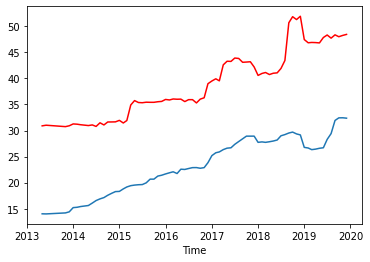

In [19]:
# Vẽ giá trà và giá coffee trung bình theo tháng
sns.lineplot(x = df_tea.index, y = df_tea.values)
sns.lineplot(x = df_coffee.index, y = df_coffee.values, color = "r")

Biển đổi dữ liệu: Để tiến hành so sánh được giá trà và giá coffee có chênh nhau không, chúng ta cần so sánh sự khác biệt giữa giá trà và coffee theo cùng thời gian và địa điểm

In [20]:
df["Time_Place"] = df.Time.astype(str) + "-" + df.Place.astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Place        7381 non-null   object        
 1   ProductId    7381 non-null   int64         
 2   ProductName  7381 non-null   object        
 3   UmId         7381 non-null   int64         
 4   UmName       7381 non-null   object        
 5   Month        7381 non-null   int64         
 6   Year         7381 non-null   int64         
 7   Price        7381 non-null   float64       
 8   Time         7381 non-null   datetime64[ns]
 9   Time_Place   7381 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 576.8+ KB


In [22]:
df.ProductName.unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [23]:
df.Time_Place.unique()

array(['2013-05-01-National Average', '2013-06-01-National Average',
       '2013-11-01-National Average', '2013-12-01-National Average',
       '2014-01-01-National Average', '2014-02-01-National Average',
       '2014-03-01-National Average', '2014-05-01-National Average',
       '2014-06-01-National Average', '2014-07-01-National Average',
       '2014-08-01-National Average', '2014-09-01-National Average',
       '2014-10-01-National Average', '2014-11-01-National Average',
       '2014-12-01-National Average', '2015-01-01-National Average',
       '2015-02-01-National Average', '2015-03-01-National Average',
       '2015-04-01-National Average', '2015-05-01-National Average',
       '2015-06-01-National Average', '2015-07-01-National Average',
       '2015-08-01-National Average', '2015-09-01-National Average',
       '2015-10-01-National Average', '2015-11-01-National Average',
       '2015-12-01-National Average', '2016-01-01-National Average',
       '2016-02-01-National Averag

In [24]:
# Lọc ra giá trà theo thời gian và địa điểm
temp_1 = df[df.ProductName == "Tea - Retail"].filter(["Time_Place", "Price"])
temp_1 = temp_1.rename(columns = {"Price": "Tea"})

# Lọc ra giá coffee theo thời gian và địa điểm
temp_2 = df[df.ProductName == "Coffee - Retail"].filter(["Time_Place", "Price"])
temp_2 = temp_2.rename(columns = {"Price": "Coffee"})

In [25]:
final_df = pd.merge(temp_1, temp_2, on = "Time_Place")
final_df.head()

,Time_Place,Tea,Coffee
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


In [26]:
# Tiến hành kiểm định giả thiết:
# Giả thiết không: Giá cà phê bằng giá trà cộng thêm 15 Lira ở mọi thời điểm
# Giả thiết đối: Giá cà phê luôn hơn giá trà 15 Lira ở mọi thời điểm

In [27]:
# Thực hiện biến đối dữ liệu
d = final_df.Coffee - final_df.Tea - 15

# Thực hiện kiểm định wilcolxon với giả thiết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative= "greater")

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

Do pvalue < 1% rất nhiều => Bác bỏ giải thiết không, chấp nhận giả thiết đối </br>
Giá cà phê luôn lớn hơn giá trà ít nhất 15 Lira mà không bị ảnh hưởng bởi thời gian hay địa điểm